In [1]:
#import libraries
import numpy as np
import seaborn as sns
import math
%matplotlib inline
import pandas as pd

import matplotlib.pyplot as plt
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


In [2]:
#import dataset
data = pd.read_csv('appl.csv')  
data.head(20)


,Unnamed: 0,Volume,adjusted cost,closed price,date,high price,low price,open price
0,0,"6,52,22,000",87.39,95.35,08-Jul-14,96.80,93.92,96.27
1,1,"3,64,36,000",87.43,95.39,09-Jul-14,95.95,94.76,95.44
2,2,"3,96,86,000",87.11,95.04,10-Jul-14,95.55,93.52,93.76
3,3,"3,40,18,000",87.27,95.22,11-Jul-14,95.89,94.86,95.36
4,4,"4,28,10,000",88.40,96.45,14-Jul-14,96.89,95.65,95.86
5,5,"4,54,77,900",87.36,95.32,15-Jul-14,96.85,95.03,96.80
6,6,"5,33,96,300",86.87,94.78,16-Jul-14,97.10,94.74,96.97
7,7,"5,72,98,000",85.32,93.09,17-Jul-14,95.28,92.57,95.03
8,8,"4,99,88,000",86.55,94.43,18-Jul-14,94.74,93.02,93.62
9,9,"3,90,79,000",86.10,93.94,21-Jul-14,95.00,93.72,94.99


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


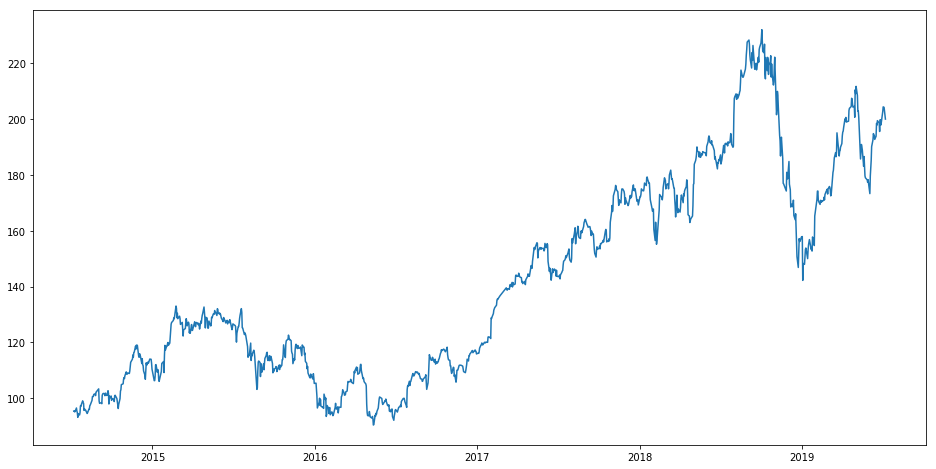

In [3]:
#setting index as date
data['date'] = pd.to_datetime(data.date,format='%d-%b-%y')
data.index = data['date']

#plot
plt.figure(figsize=(16,8))
plt.plot(data['closed price'], label='Close Price history')


In [4]:
#X=data['date'].values
#X=X.reshape(m,1)
#X.shape
#X.dtype
m=len(data)
m

1195

In [5]:
data['day'] = data['date'].dt.day
X=data['day'].values
X=X.reshape(m,1)
X.shape
X.dtype

dtype('int64')

In [6]:
y=data['closed price'].values
y=y.reshape(m,1)
y.shape
y

array([[ 95.35],
       [ 95.39],
       [ 95.04],
       ...,
       [204.41],
       [204.23],
       [200.02]])

In [7]:
#train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg=reg.fit(x_train,y_train)


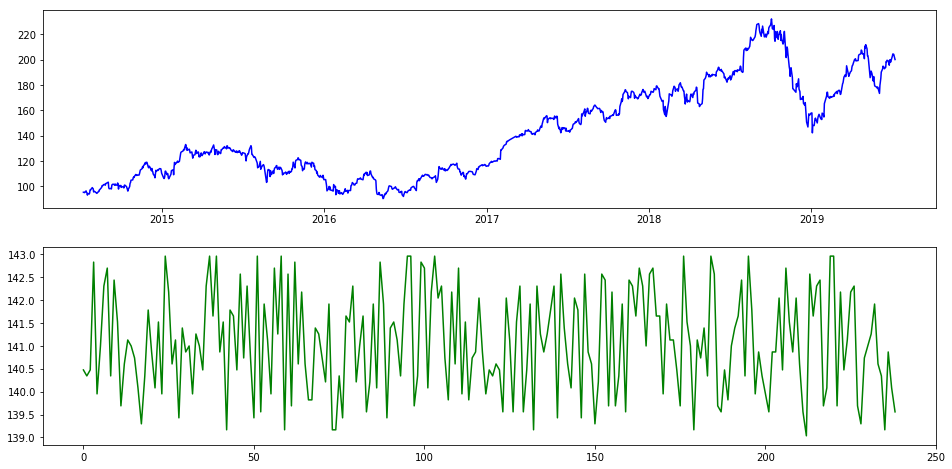

In [9]:
pred = reg.predict(x_test)
pred
#plot
fig=plt.figure(figsize=(16,8))
graph1=fig.add_subplot(2,1,1)
graph1.plot(data['closed price'],color="Blue")
graph2=fig.add_subplot(2,1,2)
graph2.plot(pred,color = 'green')

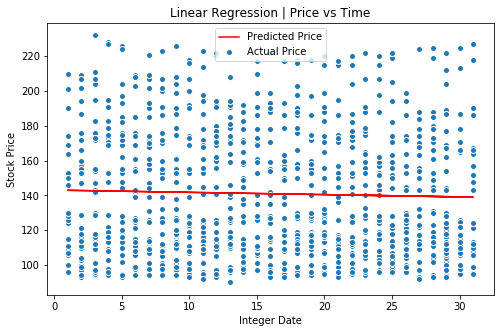

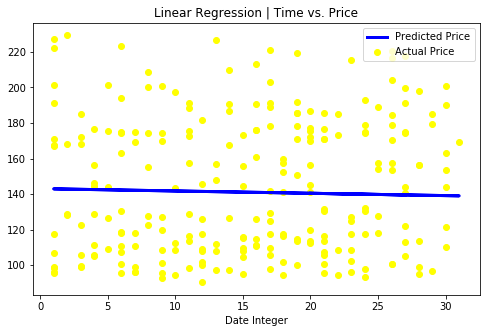

In [70]:
# Train set graph
plt.figure(1, figsize=(8,5))
plt.title('Linear Regression | Price vs Time')
plt.scatter(x_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(x_train, reg.predict(x_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

#Test Set Graph
plt.figure(1, figsize=(8,5))
plt.scatter(x_test, y_test, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(x_test, reg.predict(x_test), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Time vs. Price')
plt.legend()
plt.xlabel('Date Integer')
plt.show()

In [78]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


Root Mean Squared Error: 38.15026382036237


In [71]:
#sorting
data = data.sort_index(ascending=True, axis=0)

# Create a new DataFrame with only closing price and date
df = pd.DataFrame(data, columns=['closed price'])

# Reset index column so that we have integers to represent time for later analysis
df = df.reset_index()
df.head()

,date,closed price
0,2014-07-08,95.35
1,2014-07-09,95.39
2,2014-07-10,95.04
3,2014-07-11,95.22
4,2014-07-14,96.45


In [72]:
df.isnull().sum()

date            0
closed price    0
dtype: int64

In [73]:
#train-test split
from sklearn.model_selection import train_test_split
train,test = train_test_split(df, test_size=0.2, random_state=0)

In [74]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['closed price']
x_train

array([[30],
       [ 8],
       [22],
       [26],
       [25],
       [29],
       [ 8],
       [28],
       [30],
       [ 1],
       [ 8],
       [ 8],
       [11],
       [27],
       [17],
       [24],
       [ 6],
       [25],
       [ 1],
       [ 2],
       [18],
       [18],
       [ 7],
       [ 7],
       [19],
       [28],
       [25],
       [12],
       [30],
       [29],
       [13],
       [14],
       [21],
       [ 2],
       [20],
       [ 5],
       [15],
       [30],
       [14],
       [ 4],
       [17],
       [29],
       [16],
       [ 5],
       [19],
       [18],
       [24],
       [21],
       [15],
       [26],
       [28],
       [ 6],
       [13],
       [30],
       [27],
       [25],
       [25],
       [22],
       [19],
       [10],
       [16],
       [19],
       [10],
       [ 7],
       [17],
       [ 8],
       [25],
       [22],
       [ 8],
       [ 8],
       [ 7],
       [17],
       [21],
       [24],
       [24],
       [ 8],
       [ 7],

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg=LinearRegression()
reg=reg.fit(x_train,y_train)

In [79]:
#plt.figure(1, figsize=(16,10))
#plt.title('Linear Regression | Price vs Time')
#plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
#plt.plot(X_train, reg.predict(X_train), color='r', label='Predicted Price')
#plt.xlabel('Integer Date')
#plt.ylabel('Stock Price')
#plt.legend()
#plt.show()

In [80]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['closed price']

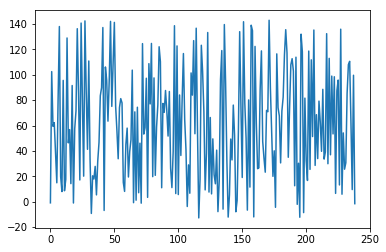

In [81]:
# Generate array with predicted values
y_pred = reg.predict(X_test)
plt.plot(y_pred)


In [82]:
# Generate 30 random numbers
randints = np.random.randint(1195, size=30)

# Select row numbers == random numbers
df_sample = df[df.index.isin(randints)]

In [83]:
x_ran = np.array(df_sample.index).reshape(-1, 1)
#predict value for random dataset
y_predr= reg.predict(x_ran)
y_predr.shape
df_sample.shape

(30, 2)

In [84]:
df_sample['preds']=y_predr
df_sample.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,date,closed price,preds
3,2014-07-11,95.22,142.692529
122,2015-01-08,111.89,127.154869
172,2015-03-25,123.38,120.626441
189,2015-04-21,126.91,118.406775
223,2015-06-10,128.88,113.967443


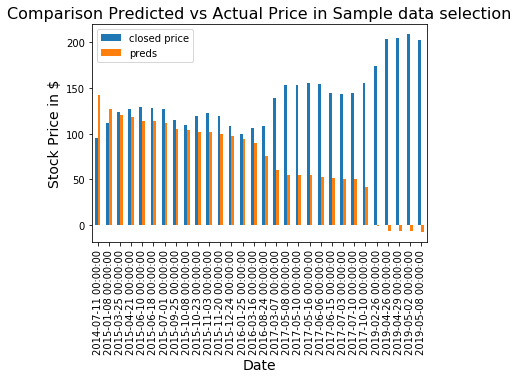

In [85]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
df_sample.plot(x='date', y=['closed price', 'preds'], kind='bar', ax=ax)
# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)

# 

# Set x label
plt.xlabel('Date', fontsize=14)

# Set y label
plt.ylabel('Stock Price in $', fontsize=14)

# Show plot
plt.show()


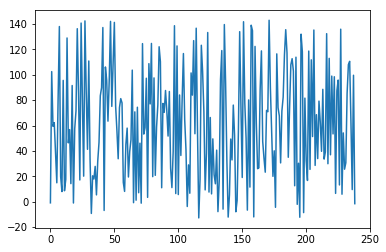

In [88]:
plt.plot(y_pred)


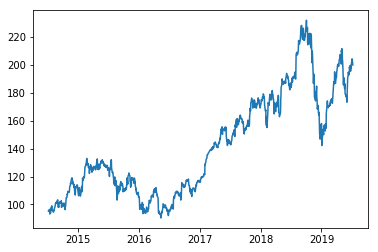

In [89]:
plt.plot(data['closed price'])

In [90]:
# Generate 30 random numbers
randints = np.random.randint(1195, size=30)

# Select row numbers == random numbers
df_sample = df[df.index.isin(randints)]

In [91]:
x_ran = np.array(df_sample.index).reshape(-1, 1)
#predict value for random dataset
y_predr= reg.predict(x_ran)
y_predr.shape
df_sample.shape

(29, 2)

In [92]:
df_sample['preds']=y_predr
df_sample.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,date,closed price,preds
114,2014-12-23,112.54,128.199418
122,2015-01-08,111.89,127.154869
156,2015-03-02,129.09,122.715538
207,2015-05-15,128.77,116.056541
216,2015-06-01,130.54,114.881423


In [93]:
df_sample.shape

(29, 3)

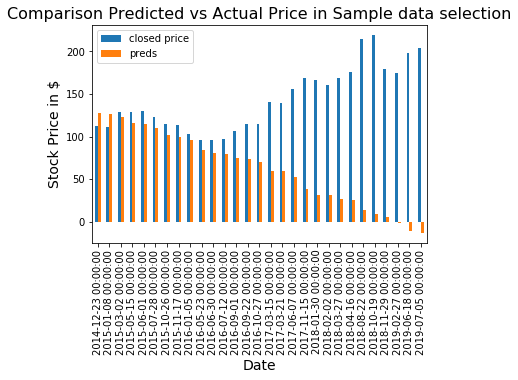

In [94]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
df_sample.plot(x='date', y=['closed price', 'preds'], kind='bar', ax=ax)
# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)

# 

# Set x label
plt.xlabel('Date', fontsize=14)

# Set y label
plt.ylabel('Stock Price in $', fontsize=14)

# Show plot
plt.show()


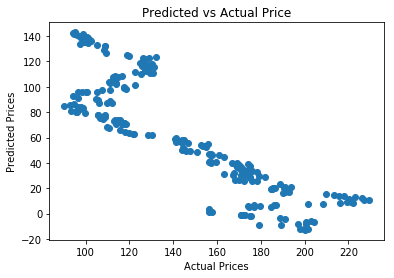

In [95]:
# Plot predicted vs actual prices
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted vs Actual Price')

plt.show()


In [96]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Root Mean Squared Error: 115.17050081925932


In [97]:
rms=np.sqrt(np.mean(np.power((np.array(y_test)-y_pred),2)))
rms

115.17050081925932

In [98]:
R2=metrics.r2_score(y_test, y_pred) 
R2

-8.248166501134584

In [99]:
reg.score(x_test, y_test)

-0.014771404104589882

# MOVING AVERAGE

In [100]:
test.shape

(239, 2)

In [101]:
#make predictions
preds = []
for i in range(0,239):
    a = train['closed price'][len(train)-239+i:].sum() + sum(preds)
    b = a/239
    preds.append(b)

In [102]:
preds

[143.5418828451883,
 143.40519616253218,
 143.3663057699068,
 143.15382169363025,
 143.23216404381282,
 143.1155622197283,
 142.99776122483178,
 143.06260541405706,
 143.19056610616605,
 143.3824094789952,
 143.09430240568554,
 142.95724927767586,
 142.84016663867033,
 142.98292884217943,
 143.05017959047305,
 143.1585067017303,
 143.37875149964546,
 143.52092200801215,
 143.60519364821306,
 143.23504801494198,
 143.11134528697102,
 143.1705977777115,
 143.2875877265722,
 143.4774102693612,
 143.43698102362634,
 143.60931148816033,
 143.5802709504539,
 143.64500011761058,
 143.65757333986002,
 143.83379749609372,
 143.96356233917362,
 143.78403749540445,
 143.5133430916196,
 143.68942402505732,
 143.5688776820659,
 143.67155081044277,
 143.85586692262032,
 143.69300444112503,
 143.76787056849372,
 143.9220876001611,
 143.61481600016177,
 143.81086125539255,
 143.60680628156575,
 143.471771998225,
 143.4285158141172,
 143.27558073384154,
 143.11284257791618,
 143.08381681464385,
 142.97

In [103]:
#calculate rmse
rms=np.sqrt(np.mean(np.power((np.array(test['closed price'])-preds),2)))
rms

37.95299998465095

In [104]:
# Generate 30 random numbers
randints = np.random.randint(1195, size=30)

# Select row numbers == random numbers
df_sample = df[df.index.isin(randints)]

In [105]:
x_ran = np.array(df_sample.index).reshape(-1, 1)
#predict value for random dataset
y_predr= reg.predict(x_ran)
y_predr.shape
df_sample.shape

(30, 2)

In [106]:
df_sample['preds']=y_predr

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [107]:
df_sample.head()

,date,closed price,preds
41,2014-09-08,98.36,137.730923
61,2014-10-06,99.62,135.119552
70,2014-10-17,97.67,133.944435
247,2015-07-17,129.62,110.833798
252,2015-07-24,124.50,110.180955


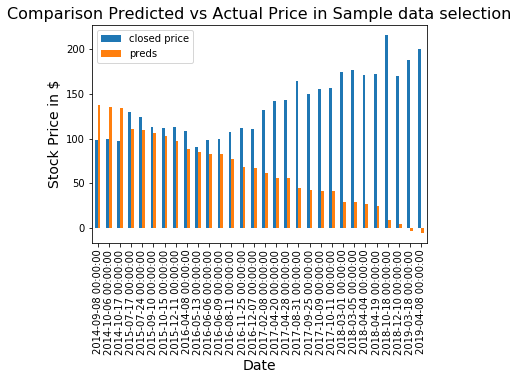

In [108]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
df_sample.plot(x='date', y=['closed price', 'preds'], kind='bar', ax=ax)
# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)

# 

# Set x label
plt.xlabel('Date', fontsize=14)

# Set y label
plt.ylabel('Stock Price in $', fontsize=14)

# Show plot
plt.show()


# KNN

In [109]:
#train-test split
from sklearn.model_selection import train_test_split
train,test = train_test_split(df, test_size=0.2, random_state=0)

In [110]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['closed price']
y_train=y_train.astype(int)

In [111]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2, p = 2)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [112]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['closed price']

In [113]:
y_pre = knn.predict(x_test)
df.shape

(1195, 2)

In [114]:
rms=np.sqrt(np.mean(np.power((np.array(y_test)-y_pre),2)))
rms

51.896998542695954

In [115]:
# Generate 30 random numbers
randints = np.random.randint(1195, size=29)

# Select row numbers == random numbers
df_sample = df[df.index.isin(randints)]

In [116]:
x_ran = np.array(df_sample.index).reshape(-1, 1)
#predict value for random dataset
y_predr= reg.predict(x_ran)
y_predr.shape
df_sample.shape

(29, 2)

In [117]:
df_sample['preds']=y_predr

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [118]:
df_sample.head()

,date,closed price,preds
3,2014-07-11,95.22,142.692529
122,2015-01-08,111.89,127.154869
145,2015-02-12,126.46,124.151792
158,2015-03-04,128.54,122.454401
220,2015-06-05,128.65,114.359149


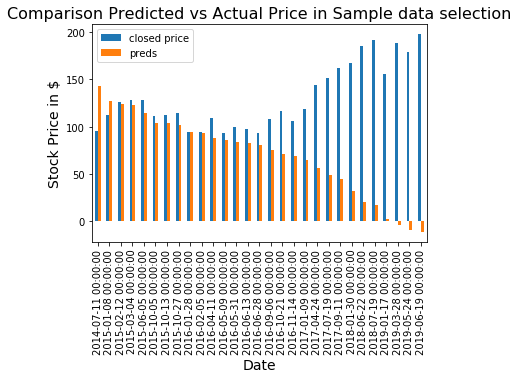

In [119]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
df_sample.plot(x='date', y=['closed price', 'preds'], kind='bar', ax=ax)
# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)

# 

# Set x label
plt.xlabel('Date', fontsize=14)

# Set y label
plt.ylabel('Stock Price in $', fontsize=14)

# Show plot
plt.show()


In [120]:
rms=np.sqrt(np.mean(np.power((np.array(y_test)-y_pre),2)))
rms

51.896998542695954